# Overview #
This notebook walks you through some simple but general key-ideas in machine learning. In particular we will perform the following steps:

   * Import or create a dataset
   * Visualize the dataset
   * Train a simple classifier on the dataset
   * Make predictions with the trained classifier

Furthermore, we will investigate what happens when the data becomes harder.  Specifically we are looking at: 
   * ways to deal with non-linearly seperable data.  
   * ways to deal with underfitting
   * ways to deal with overfitting

In [2]:
# Import NumPy and Scikit-learn. 
# See http://scikit-learn.org/stable/user_guide.html for many more tutorials
import time
import numpy as np
np.random.seed(0)
# Import matlibplot and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# <!-- collapse=True -->

# Modified from http://scikit-learn.org/stable/auto_examples/plot_learning_curve.html
from sklearn.learning_curve import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects
    """
    
    plt.figure()
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid("on") 
    if ylim:
        plt.ylim(ylim)
    plt.title(title)

C:\Users\otmar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\otmar\Anaconda3\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [4]:
# <!-- collapse=True -->

def plot_model_parameters(estimator,title,X,y):
    """
      Plots decision surface, support vectors and margins for SVM classifiers
    """
    # get the separating hyperplane
    w = estimator.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (estimator.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    b = estimator.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = estimator.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])

    # plot the line, the points, and the nearest vectors to the plane
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(estimator.support_vectors_[:, 0], estimator.support_vectors_[:, 1],
            s=90, facecolors='black')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)


    plt.axis('tight')
    plt.title(title)
    plt.show()
    
def plot_data(X,y):
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)

    plt.axis('tight')
    plt.show()
    
def plot_model_parameters_non_linear(estimator,title,X,y): 
    h = .02  # step size in the mesh
    
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    plt.axis('tight')
    

    plt.show()



# Data #

First, we will generate some simple toy data. 

Using [sklearn](http://scikit-learn.org)'s `make_classification` and `make_blob` functions you have more control over the type of data and its distribution. 

**Practical tip:** sklearn has many useful helper functions to deal with real data and data pre-processing (http://scikit-learn.org/stable/data_transforms.html) that can be used in real-world settings.

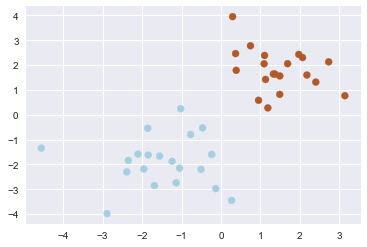

In [5]:
# we create 100 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

plot_data(X,Y)

# Training

Now let's create and train a linear SVM on this data. The procedure shown here is the same for almost all ML estimators in sklearn:

   * create an estimator instance
   * train the estimator via its .fit() function
   * make predictions via the .predict() function
   * you can typically access the learned model parameters via the .coeff_ field

In [6]:
# import SVM module
from sklearn import svm

# create and fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Visualizing Model Parameters

Now we will look at the learned model. Or rather the estimated model parameters.

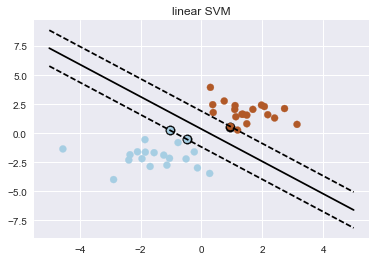

In [7]:
plot_model_parameters(clf,"linear SVM",X,Y)

# Non Linearily Seperable Data

This ideal case of two completely non-overlapping clusters is of course not realistic. Now we will look at some more realistic data.

Again we synthesize some data and will train a model on this. 

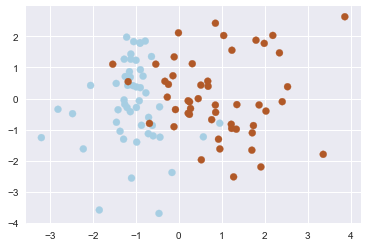

In [8]:
from sklearn.datasets import make_classification
X, y = make_classification(100, n_features=2, n_informative=2, 
                           n_redundant=0, n_classes=2, random_state=0)


plot_data(X,y)

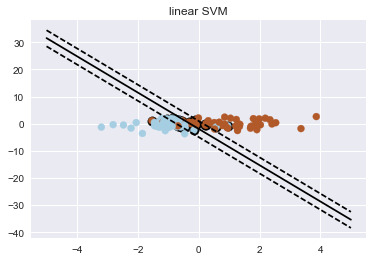

In [9]:
# create and fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)
#let's see how well that worked
plot_model_parameters(clf,"linear SVM",X,y)

That didn't work so well. Let's try an even harder case.

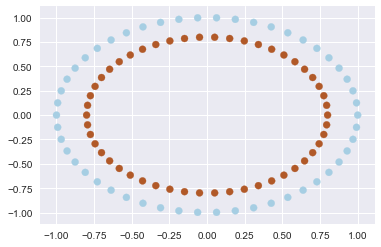

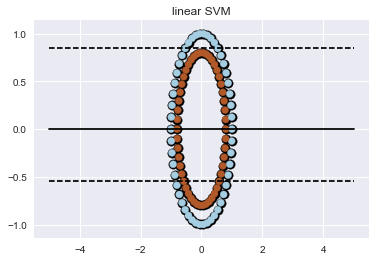

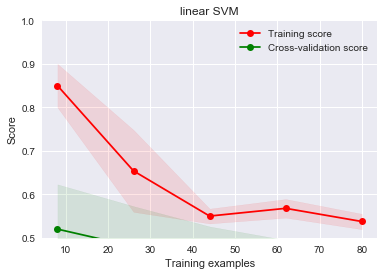

In [10]:
from sklearn.datasets import make_circles
X,y = make_circles(100,2)

plot_data(X,y)

# create and fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)
#let's see how well that worked
plot_model_parameters(clf,"linear SVM",X,y)

#Also let's look at learning and validation error
plot_learning_curve(clf, "linear SVM", 
                    X, y, ylim=(0.5, 1.0),
                    train_sizes=np.linspace(.1, 1.0, 5))

Uh-Oh - that didn't work at all. What now? (Let's go back to slides)



# Kernel Trick
In the above example the model is _underfitting_ (it performs bad both on test and training data). We need to use a model with higher model capacity. For this we will use kernel SVMs

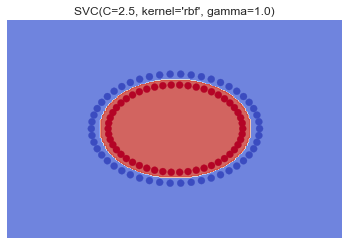

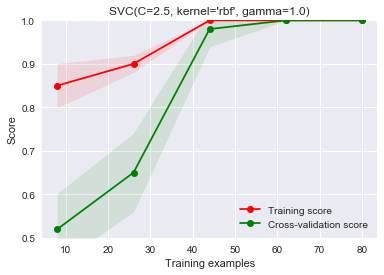

In [11]:
from sklearn.svm import SVC

clf=SVC(C=2.5, kernel="rbf", gamma=1.0)
clf.fit(X,y)

plot_model_parameters_non_linear(clf,"SVC(C=2.5, kernel='rbf', gamma=1.0)",X,y)

plot_learning_curve(clf,
                    "SVC(C=2.5, kernel='rbf', gamma=1.0)",
                    X, y, ylim=(0.5, 1.0), 
                    train_sizes=np.linspace(.1, 1.0, 5))

# A more realistic example
We are now going to look at a more realistic example. The key idea will now be how to control overfitting

In [12]:
X, y = make_classification(1000, n_features=20, n_informative=2, 
                           n_redundant=2, n_classes=2, random_state=0)

from pandas import DataFrame
df = DataFrame(np.hstack((X, y[:, None])), columns = list(range(20)) + ["class"])

In [13]:
df[:5]

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,class
0,-1.063780,0.676409,1.069356,-0.217580,0.460215,-0.399167,-0.079188,1.209385,-0.785315,-0.172186,...,-0.993119,0.306935,0.064058,-1.054233,-0.527496,-0.074183,-0.355628,1.057214,-0.902592,0.0
1,0.070848,-1.695281,2.449449,-0.530494,-0.932962,2.865204,2.435729,-1.618500,1.300717,0.348402,...,0.225324,0.605563,-0.192101,-0.068027,0.971681,-1.792048,0.017083,-0.375669,-0.623236,1.0
2,0.940284,-0.492146,0.677956,-0.227754,1.401753,1.231653,-0.777464,0.015616,1.331713,1.084773,...,-0.050120,0.948386,-0.173428,-0.477672,0.760896,1.001158,-0.069464,1.359046,-1.189590,1.0
3,-0.299517,0.759890,0.182803,-1.550233,0.338218,0.363241,-2.100525,-0.438068,-0.166393,-0.340835,...,1.178724,2.831480,0.142414,-0.202819,2.405715,0.313305,0.404356,-0.287546,-2.847803,1.0
4,-2.630627,0.231034,0.042463,0.478851,1.546742,1.637956,-1.532072,-0.734445,0.465855,0.473836,...,-1.061194,-0.888880,1.238409,-0.572829,-1.275339,1.003007,-0.477128,0.098536,0.527804,0.0


# Data visualization
The first step in building an ML pipeline is to understand the data. The table above helps but it's hard to glean insights. We'll use [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) to vizualize our data. 

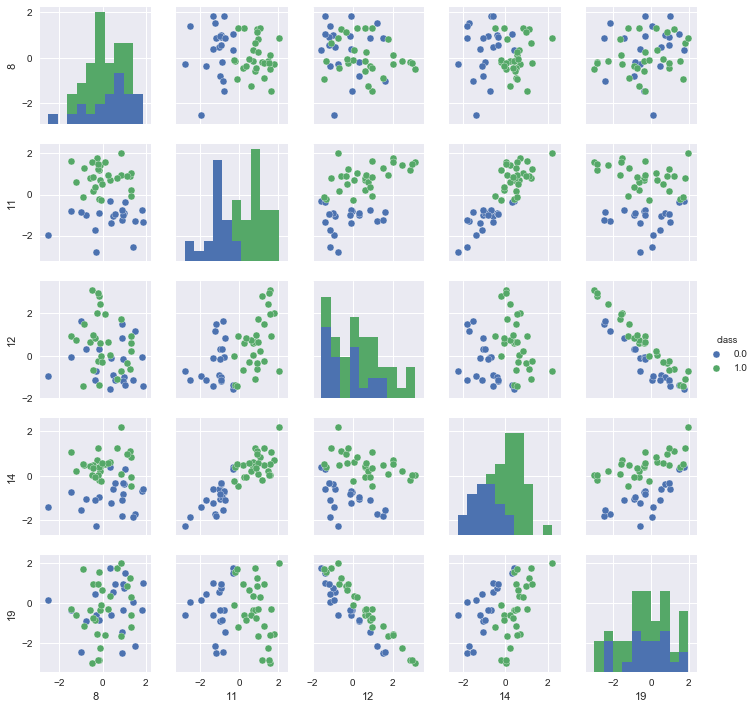

In [14]:
_ = sns.pairplot(df[:50], vars=[8, 11, 12, 14, 19], hue="class", size=2)

We can see that some features (11&14) are more helpful to distinguish the two classes than others _(study the call to make_classification to understand why)_.  
Feature 12 and 19 are highly anti-correlated. 

We can explore correlations more systematically by using corrplot:

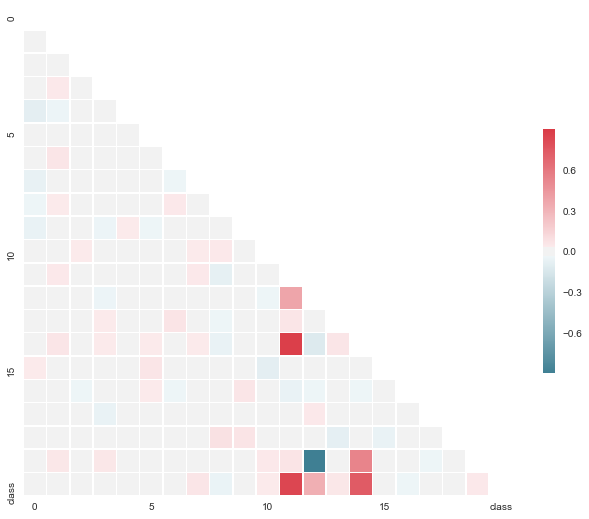

In [15]:
# Compute the correlation matrix
corr = df.corr()

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#plotting
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Model selection

We'll first try the linear SVM again. 

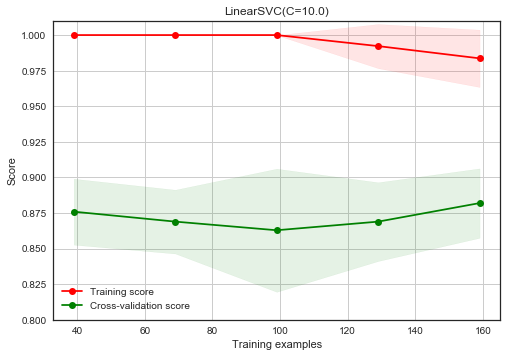

In [16]:
from sklearn.svm import LinearSVC
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0)",
                    X, y, ylim=(0.8, 1.01),
                    train_sizes=np.linspace(.05, 0.2, 5))

The learning curve shows a huge gap between performance on training data and the performance on test data. This model is not going to perform well on real data - the model is _overfitting_

# Controlling overfitting

There are different ways to decreasing overfitting:

   * **more training examples** (getting more data is a common wish in ML)

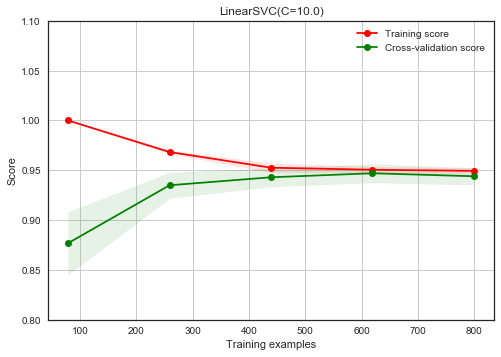

In [17]:
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0)",
                    X, y, ylim=(0.8, 1.1),
                    train_sizes=np.linspace(.1, 1.0, 5))

That looks better! 

**Unfortunately getting more training data is often costly. Especially in HCI (where this involves getting humans do do things) it is often not feasible to collect sufficient data.**

An alternative would be:

 * **decrease the number of features** (we know that f11 & f14 are most informative)
 
Let's use those informative features. However, note that this is 'cheating' in the real-world finding informative features is much harder.  

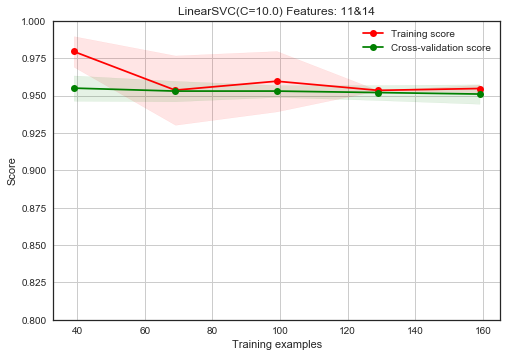

In [18]:
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0) Features: 11&14",
                    X[:, [11, 14]], y, ylim=(0.8, 1.0),
                    train_sizes=np.linspace(.05, 0.2, 5))

Let's try an automatic approach:

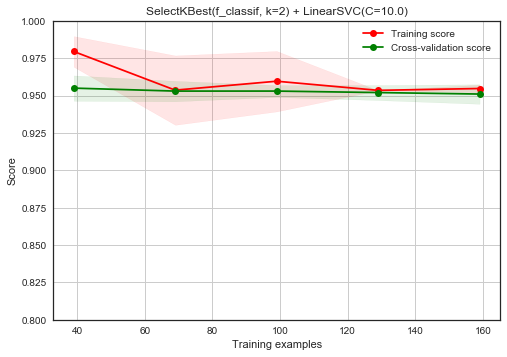

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
# SelectKBest(f_classif, k=2) will select the k=2 best features according to their Anova F-value

plot_learning_curve(Pipeline([("fs", SelectKBest(f_classif, k=2)), # select two features
                               ("svc", LinearSVC(C=10.0))]),
                    "SelectKBest(f_classif, k=2) + LinearSVC(C=10.0)",
                    X, y, ylim=(0.8, 1.0),
                    train_sizes=np.linspace(.05, 0.2, 5))

This worked remarkably well. Feature selection is simple on this toy data. **Again: with real data this is a much harder problem!**

# Model parameters
Another aspect of interest are the parameters of the classifier. In SVMs this would be the regularizition and Kernel parameters. Finding the best parameters here can turn into a wild goose chase if done manually. 

The best way to do this is via **grid-search** and **k-fold cross-valditation**. Luckily this is built into sklear:

C:\Users\otmar\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Chosen parameter on 100 datapoints: {'C': 0.01}


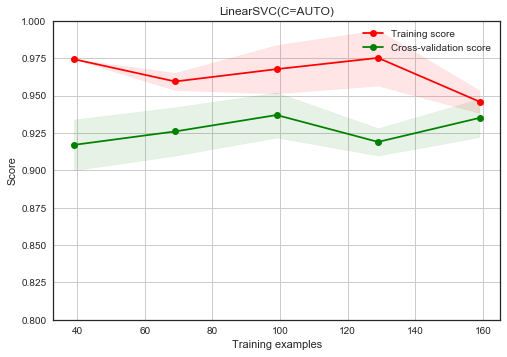

In [20]:
from sklearn.grid_search import GridSearchCV

est = GridSearchCV(LinearSVC(), 
                   param_grid={"C": [0.001, 0.01, 0.1, 1.0, 10.0]})
plot_learning_curve(est, "LinearSVC(C=AUTO)", 
                    X, y, ylim=(0.8, 1.0),
                    train_sizes=np.linspace(.05, 0.2, 5))
print("Chosen parameter on 100 datapoints: %s" % est.fit(X[:100], y[:100]).best_params_)

In general, feature selection looked better. 

# L1-Norm
LinearSVC also supports the l1 penalty, which results in sparse solutions. Sparse solutions correspond to an implicit feature selection. Let's try this:

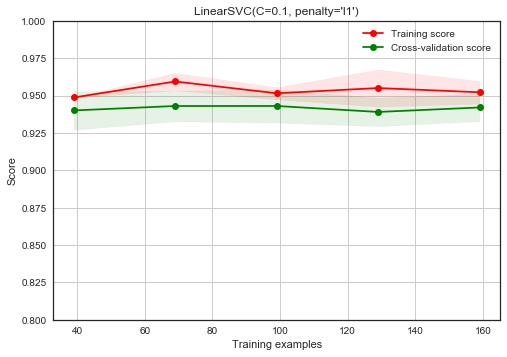

In [21]:
plot_learning_curve(LinearSVC(C=0.1, penalty='l1', dual=False), 
                    "LinearSVC(C=0.1, penalty='l1')", 
                    X, y, ylim=(0.8, 1.0),
                    train_sizes=np.linspace(.05, 0.2, 5))

This also looks quite well! 

# Summary
Let's stop here and summarize:

   * We have discussed some recommendations of how to get machine learning working on a new problem. 
   * We have looked at classification problems but regression and clustering can be addressed similarly. 
   * Hoewever, the focus on artificial datasets was (while being easily to understand) also somewhat oversimplifying. 
   * On many actual problems, the collection, organisation, and preprocessing of the data are of uttermost importance.
   * In many HCI problems signal processing and feature selection domainate the process. However, there is a big push in ML towards learning the whole pipeline in an end-to-end fashion via deep neural networks. This is an advanced topic and is left for next time.